In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading files

In [200]:
results = pd.read_csv('./data/lotofacil.csv')

In [201]:
results.shape

(3571, 33)

In [202]:
results.head()

,Concurso,Data Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,...,Rateio 13 acertos,Ganhadores 12 acertos,Rateio 12 acertos,Ganhadores 11 acertos,Rateio 11 acertos,Acumulado 15 acertos,Arrecadacao Total,Estimativa Prêmio,Acumulado sorteio especial Lotofácil da Independência,Observação
0,1,29/09/2003,2,3,5,6,9,10,11,13,...,"R$10,00",48807,"R$4,00",257593,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
1,2,06/10/2003,1,4,5,6,7,9,11,12,...,"R$10,00",81252,"R$4,00",478188,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",ESTIMATIVA DE PRÊMIO PARA O PRÓXIMO CONCURSO (...
2,3,13/10/2003,1,4,6,7,8,9,10,11,...,"R$10,00",96244,"R$4,00",608211,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
3,4,20/10/2003,1,2,4,5,8,10,12,13,...,"R$10,00",123912,"R$4,00",706657,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
4,5,27/10/2003,1,2,4,8,9,11,12,13,...,"R$10,00",195636,"R$4,00",860992,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio para o próximo concurso (...


In [203]:
results.dtypes

Concurso                                                  int64
Data Sorteio                                             object
Bola1                                                     int64
Bola2                                                     int64
Bola3                                                     int64
Bola4                                                     int64
Bola5                                                     int64
Bola6                                                     int64
Bola7                                                     int64
Bola8                                                     int64
Bola9                                                     int64
Bola10                                                    int64
Bola11                                                    int64
Bola12                                                    int64
Bola13                                                    int64
Bola14                                  

### Rename coluns

In [204]:
results.rename(columns={
    'Concurso': 'concurso', 
    'Bola1': 'bola1',
    'Bola2': 'bola2',
    'Bola3': 'bola3',
    'Bola4': 'bola4',
    'Bola5': 'bola5',
    'Bola6': 'bola6',
    'Bola7': 'bola7',
    'Bola8': 'bola8',
    'Bola9': 'bola9',
    'Bola10': 'bola10',
    'Bola11': 'bola11',
    'Bola12': 'bola12',
    'Bola13': 'bola13',
    'Bola14': 'bola14',
    'Bola15': 'bola15',
    'Cidade / UF': 'uf'
}, inplace=True)

### Converta Data Sorteio do US format

In [205]:
results['data_sorteio'] = pd.to_datetime(results['Data Sorteio'],format='%d/%m/%Y')

### Add field total_sum

In [206]:
results['total_sum'] = results[['bola1','bola2','bola3','bola4','bola5','bola6','bola7','bola8','bola9','bola10','bola11','bola12','bola13','bola14','bola15']].sum(axis=1)

### Separate the data into two dataframes, one with the results and the other with the states.

In [207]:
draw_columns = ['concurso','data_sorteio','bola1','bola2','bola3','bola4','bola5','bola6','bola7','bola8','bola9','bola10','bola11','bola12','bola13','bola14','bola15','total_sum']
states_coluns = ['concurso','data_sorteio','uf']
draw_df = results[[*draw_columns]].copy()
states_df = results[[*states_coluns]].copy()


In [208]:
draw_df.head()

,concurso,data_sorteio,bola1,bola2,bola3,bola4,bola5,bola6,bola7,bola8,bola9,bola10,bola11,bola12,bola13,bola14,bola15,total_sum
0,1,2003-09-29,2,3,5,6,9,10,11,13,14,16,18,20,23,24,25,199
1,2,2003-10-06,1,4,5,6,7,9,11,12,13,15,16,19,20,23,24,185
2,3,2003-10-13,1,4,6,7,8,9,10,11,12,14,16,17,20,23,24,182
3,4,2003-10-20,1,2,4,5,8,10,12,13,16,17,18,19,23,24,25,197
4,5,2003-10-27,1,2,4,8,9,11,12,13,15,16,19,20,23,24,25,202


In [209]:
states_df['uf'] = states_df['uf'].str.split(';')

# Explode uf column
states_exploded = states_df.explode('uf')
states_exploded.head()

,concurso,data_sorteio,uf
0,1,2003-09-29,BA
0,1,2003-09-29,PR
0,1,2003-09-29,SP
1,2,2003-10-06,SP
2,3,2003-10-13,SP


### Frequency analysis

In [210]:
"""
melt
Combine all columns ball1 … ball15
Place all values ​​into a single column
Create a giant list of drawn numbers
"""
numbers_df = draw_df.filter(like='bola')
numbers_long = numbers_df.melt(value_name='numbers') # 
numbers_long.head()


,variable,numbers
0,bola1,2
1,bola1,1
2,bola1,1
3,bola1,1
4,bola1,1


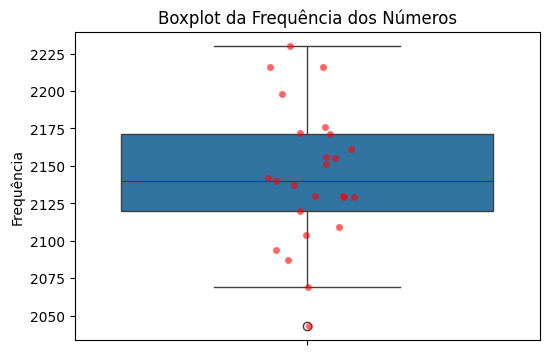

In [211]:
freq_numbers_df = numbers_long['numbers'].value_counts().sort_index() # count and order

plt.figure(figsize=(6, 4))
sns.boxplot(y=freq_numbers_df)
sns.stripplot(y=freq_numbers_df, color='red', alpha=0.6)
plt.title('Boxplot da Frequência dos Números')
plt.ylabel('Frequência')
plt.show()

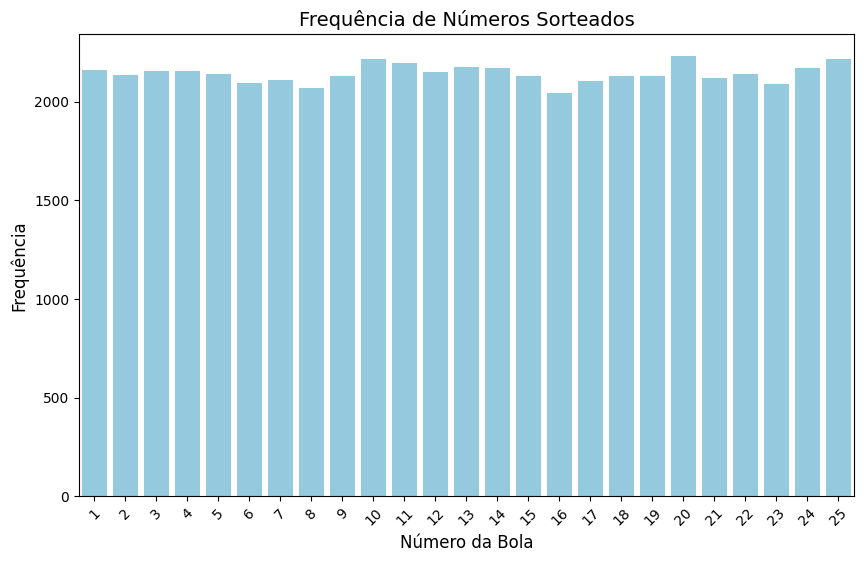

In [212]:
plt.figure(figsize=(10, 6))

sns.barplot(x=freq_numbers_df.index, y=freq_numbers_df.values, color='skyblue')

plt.title('Frequência de Números Sorteados', fontsize=14)
plt.xlabel('Número da Bola', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)

plt.show()

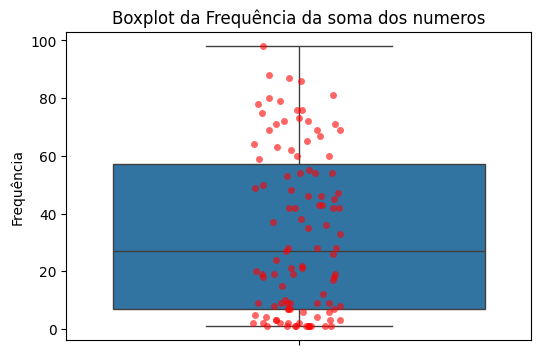

In [213]:
total_sum_freq = results['total_sum'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.boxplot(y=total_sum_freq)
sns.stripplot(y=total_sum_freq, color='red', alpha=0.6)
plt.title('Boxplot da Frequência da soma dos numeros')
plt.ylabel('Frequência')
plt.show()

In [214]:
total_sum_freq.head()

total_sum
133    1
141    2
144    1
146    1
147    2
Name: count, dtype: int64

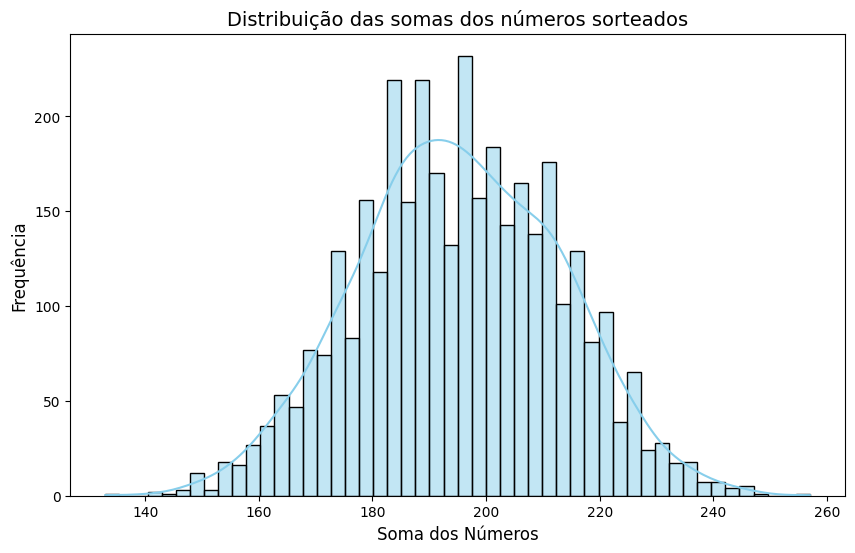

In [215]:
plt.figure(figsize=(10, 6))
sns.histplot(results['total_sum'], bins=50, kde=True, color='skyblue')

plt.title('Distribuição das somas dos números sorteados', fontsize=14)
plt.xlabel('Soma dos Números', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

O que mais pode fazer com a soma?

Análise de média: Ver se há uma média de soma consistente ao longo dos sorteios.

Intervalo de soma: Definir faixas (ex: soma entre 190 e 210) e verificar a frequência com que ocorrem.

Gráfico: Como mostrado acima, você pode comparar distribuições da soma entre sorteios ou com outros dados.

In [216]:
results['total_sum'].describe()

count    3571.000000
mean      195.190703
std        17.853913
min       133.000000
25%       183.000000
50%       195.000000
75%       208.000000
max       257.000000
Name: total_sum, dtype: float64

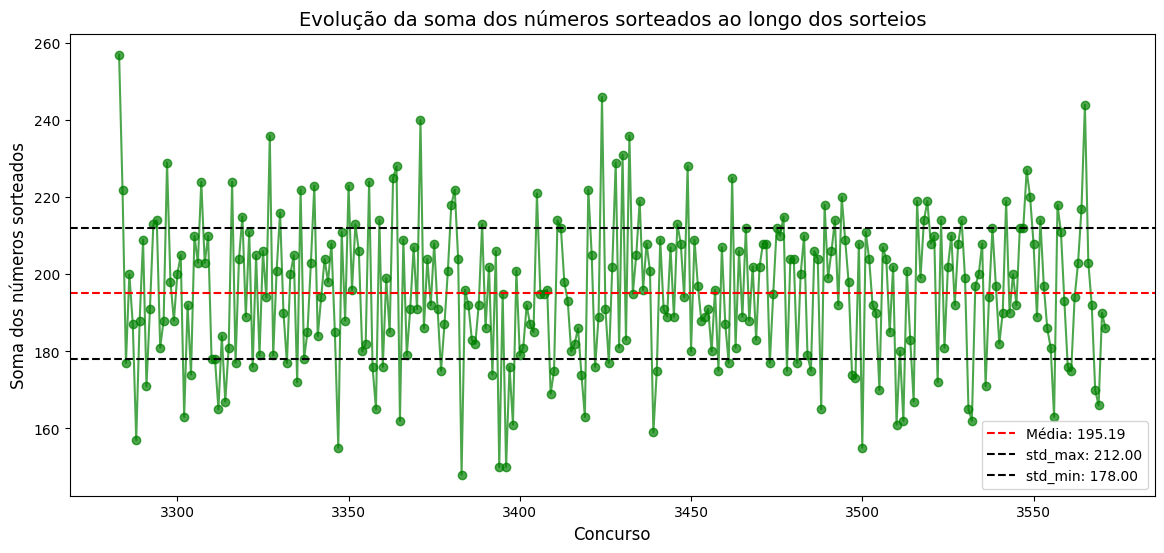

In [217]:
media_somas = results['total_sum'].mean()

results_3000 = results[results['concurso'] > 3282]

plt.figure(figsize=(14, 6))

# Plotando a evolução das somas ao longo dos sorteios
plt.plot(results_3000['concurso'], results_3000['total_sum'], color='green', marker='o', linestyle='-', alpha=0.7)

# Adicionando uma linha horizontal para a média
plt.axhline(y=media_somas, color='red', linestyle='--', label=f'Média: {media_somas:.2f}')
plt.axhline(y=212, color='black', linestyle='--', label=f'std_max: {212:.2f}')
plt.axhline(y=178, color='black', linestyle='--', label=f'std_min: {178:.2f}')

# Títulos e rótulos
plt.title('Evolução da soma dos números sorteados ao longo dos sorteios', fontsize=14)
plt.xlabel('Concurso', fontsize=12)
plt.ylabel('Soma dos números sorteados', fontsize=12)

# Legenda
plt.legend()

# Exibindo o gráfico
plt.show()

In [218]:
# compare results
original_numbers = draw_df.copy()

# remove columns 
original_numbers = original_numbers.drop(columns=['concurso', 'data_sorteio', 'total_sum'])

original_numbers.head(2)

,bola1,bola2,bola3,bola4,bola5,bola6,bola7,bola8,bola9,bola10,bola11,bola12,bola13,bola14,bola15
0,2,3,5,6,9,10,11,13,14,16,18,20,23,24,25
1,1,4,5,6,7,9,11,12,13,15,16,19,20,23,24


In [232]:
# loading generated files
generated_numbers = pd.read_csv('./data/generated.csv')

# remove coluns 
generated_numbers = generated_numbers.drop(columns=['concurso'])

generated_numbers.head(2)

,bola1,bola2,bola3,bola4,bola5,bola6,bola7,bola8,bola9,bola10,bola11,bola12,bola13,bola14,bola15,bola16
0,2,3,5,6,9,10,11,12,13,14,16,18,20,23,24,25
1,1,2,3,4,8,12,13,14,16,17,18,19,20,21,23,25


In [223]:
df_original = original_numbers.astype(int)
df_generated = generated_numbers.astype(int)

# Realizar o merge entre os dois DataFrames
merged = pd.merge(df_generated, df_original, how='inner')

# Verificar se existem linhas no 'generated' que estão no 'original'
if not merged.empty:
    print(f"Existem linhas no 'generated' que estão no 'original':")
    print(f"Are there equal fields? {len(merged)}")
else:
    print("Nenhuma linha do 'generated' está no 'original'.")

merged.head()

Existem linhas no 'generated' que estão no 'original':
Are there equal fields? 5


,bola1,bola2,bola3,bola4,bola5,bola6,bola7,bola8,bola9,bola10,bola11,bola12,bola13,bola14,bola15
0,1,2,3,4,5,6,8,11,13,15,16,18,22,23,25
1,2,3,4,5,6,8,11,13,14,15,17,19,20,21,25
2,1,2,3,5,6,7,9,10,14,15,20,21,22,24,25
3,1,2,4,5,7,8,9,10,11,16,17,21,22,23,24
4,1,3,4,6,8,10,12,13,14,16,17,18,20,24,25


In [239]:
df_15 = original_numbers.copy()
df_16 = generated_numbers.copy()

# Comparar se os números de cada aposta de 16 bolas estão presentes em alguma aposta de 15 bolas
resultado_comparacao = []

# Percorrer cada linha do DataFrame com 16 bolas (apostas com 16 números)
for i, aposta_16 in df_16.iterrows():
    aposta_16_numeros = set(aposta_16.values)  # Converte a linha de apostas de 16 bolas para um set
    aposta_16_numeros.discard('bola1')  # Remover a coluna 'bola1' (cabeçalho)
    aposta_16_numeros.discard('bola2')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola3')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola4')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola5')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola6')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola7')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola8')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola9')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola10')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola11')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola12')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola13')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola14')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola16')  # Remover a coluna 'bola2' (cabeçalho)
    aposta_16_numeros.discard('bola16')  # Remover a coluna 'bola2' (cabeçalho)
    # ... Repita isso para todas as colunas de cabeçalho, de bola1 até bola16
    
    # Verificar se todos os números de aposta_16 estão presentes em alguma linha de aposta_15
    encontrou = False
    for _, aposta_15 in df_15.iterrows():  # Percorrer cada linha do DataFrame com 15 bolas
        aposta_15_numeros = set(aposta_15.values)  # Converte a linha de apostas de 15 bolas para um set
        aposta_15_numeros.discard('bola1')  # Remover a coluna 'bola1'
        aposta_15_numeros.discard('bola2')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola3')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola4')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola5')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola6')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola7')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola8')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola9')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola10')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola11')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola12')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola13')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola14')  # Remover a coluna 'bola2'
        aposta_15_numeros.discard('bola15')  # Remover a coluna 'bola2'
        # ... Repita isso para todas as colunas de cabeçalho, de bola1 até bola15

        # Verificar se todos os números da aposta de 16 estão na aposta de 15
        if aposta_16_numeros.issubset(aposta_15_numeros):
            encontrou = True
            break

    resultado_comparacao.append(encontrou)  # Adicionar True ou False ao resultado

# Adicionar a coluna 'Resultado' ao DataFrame df_16
df_16['Resultado'] = resultado_comparacao

# Filtrar as apostas que deram certo
df_16_acertou = df_16[df_16['Resultado'] == True]

# Mostrar as apostas que deram certo
print(df_16_acertou)

# Salvar em um novo arquivo CSV, se necessário
df_16_acertou.to_csv('apostas_acertadas.csv', index=False)

Empty DataFrame
Columns: [bola1, bola2, bola3, bola4, bola5, bola6, bola7, bola8, bola9, bola10, bola11, bola12, bola13, bola14, bola15, bola16, Resultado]
Index: []
